In [1]:
from PencilDrawingBySketchAndTone import *
import matplotlib.pyplot as plt
import torchvision
import time
import os
from tqdm.notebook import tqdm

In [2]:
imagenet = torchvision.datasets.ImageFolder('/home/math/oberman-lab/datasets/imagenet/val/', transform=torchvision.transforms.ToTensor())

In [5]:
pencils = {
    'pencil0':'pencils/pencil0.jpg',
    'pencil1':'pencils/pencil1.jpg',
    'pencil2':'pencils/pencil2.png',
    'pencil3':'pencils/pencil3.jpg',
}

0it [00:00, ?it/s]

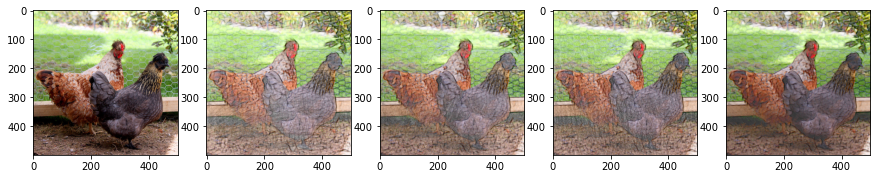

In [6]:
fig, axs = plt.subplots(1,len(pencils)+1, figsize=(15,5))
filename = imagenet.samples[400][0]
img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
axs[0].imshow(img)
for i, pencil in tqdm(enumerate(pencils)):
    start = time.time()
    pencil_tex = pencils[pencil]
    im_pen = gen_pencil_drawing(img, kernel_size=8, stroke_width=1, num_of_directions=8, smooth_kernel="gauss",
                       gradient_method=1, rgb=True, w_group=2, pencil_texture_path=pencil_tex,
                               stroke_darkness=2, tone_darkness=1.5)
    if np.isnan(im_pen).any():
        tqdm.write(f'Failed {pencil} {filename}')
#         import ipdb; ipdb.set_trace()
    im_pen = exposure.rescale_intensity(im_pen, in_range=(0,1))
    axs[i+1].imshow(im_pen)
    end = time.time()
#     print(f'Elapsed time {end-start:1.2f}')
#     axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))